In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
dfT = pd.read_csv('./data/thyroidDF.csv')
# retirando as colunas que não iremos utilizar para treinar o modelo
dfT.drop(columns=['patient_id', 'TSH_measured', 'T3_measured', 'TT4_measured', 
                  'T4U_measured', 'FTI_measured', 'TBG_measured', 
                  'referral_source'], axis=1, inplace=True)

In [3]:
dfT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9172 entries, 0 to 9171
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  9172 non-null   int64  
 1   sex                  8865 non-null   object 
 2   on_thyroxine         9172 non-null   object 
 3   query_on_thyroxine   9172 non-null   object 
 4   on_antithyroid_meds  9172 non-null   object 
 5   sick                 9172 non-null   object 
 6   pregnant             9172 non-null   object 
 7   thyroid_surgery      9172 non-null   object 
 8   I131_treatment       9172 non-null   object 
 9   query_hypothyroid    9172 non-null   object 
 10  query_hyperthyroid   9172 non-null   object 
 11  lithium              9172 non-null   object 
 12  goitre               9172 non-null   object 
 13  tumor                9172 non-null   object 
 14  hypopituitary        9172 non-null   object 
 15  psych                9172 non-null   o

In [4]:
# porcentagem de linhas vazias que sobraram depois de termos retirados algumas colunas

(dfT.isna().sum() / 9172) * 100

age                     0.000000
sex                     3.347143
on_thyroxine            0.000000
query_on_thyroxine      0.000000
on_antithyroid_meds     0.000000
sick                    0.000000
pregnant                0.000000
thyroid_surgery         0.000000
I131_treatment          0.000000
query_hypothyroid       0.000000
query_hyperthyroid      0.000000
lithium                 0.000000
goitre                  0.000000
tumor                   0.000000
hypopituitary           0.000000
psych                   0.000000
TSH                     9.180113
T3                     28.390754
TT4                     4.819014
T4U                     8.820323
FTI                     8.744003
TBG                    96.194941
target                  0.000000
dtype: float64

In [5]:
diagnoses = {'-': 'negative',
             'A': 'hyperthyroid', 
             'B': 'hyperthyroid', 
             'C': 'hyperthyroid', 
             'D': 'hyperthyroid',
             'E': 'hypothyroid', 
             'F': 'hypothyroid', 
             'G': 'hypothyroid', 
             'H': 'hypothyroid'}

dfT['target'] = dfT['target'].map(diagnoses) # re-mapping
# dropping observations with 'target' null after re-mapping
dfT.dropna(subset=['target'], inplace=True)

In [7]:
dfT.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,TBG,target
0,29,F,f,f,f,f,f,f,f,t,...,f,f,f,0.3,NaN,NaN,NaN,NaN,NaN,negative
1,29,F,f,f,f,f,f,f,f,f,...,f,f,f,1.6,1.9,128.0,NaN,NaN,NaN,negative
2,41,F,f,f,f,f,f,f,f,f,...,f,f,f,NaN,NaN,NaN,NaN,NaN,11.0,negative
3,36,F,f,f,f,f,f,f,f,f,...,f,f,f,NaN,NaN,NaN,NaN,NaN,26.0,negative
5,60,F,f,f,f,f,f,f,f,f,...,f,f,f,NaN,NaN,NaN,NaN,NaN,26.0,negative


In [8]:
dfT.tail()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,TBG,target
9166,70,F,f,f,f,f,f,f,f,f,...,f,f,f,NaN,NaN,88.0,0.74,119.0,NaN,negative
9167,56,M,f,f,f,f,f,f,f,f,...,f,f,f,NaN,NaN,64.0,0.83,77.0,NaN,negative
9168,22,M,f,f,f,f,f,f,f,f,...,f,f,f,NaN,NaN,91.0,0.92,99.0,NaN,negative
9170,47,F,f,f,f,f,f,f,f,f,...,f,f,f,NaN,NaN,75.0,0.85,88.0,NaN,negative
9171,31,M,f,f,f,f,f,f,f,t,...,f,f,f,NaN,NaN,66.0,1.02,65.0,NaN,negative


In [13]:
dfT['age'].max()

65526

In [14]:
dfT.describe()


,age,TSH,T3,TT4,T4U,FTI,TBG
count,7546.000000,6824.000000,5337.000000,7192.000000,6870.000000,6877.000000,259.000000
mean,78.013782,5.421753,2.020935,105.203373,0.967322,110.571745,22.955019
std,1305.258137,26.080471,0.809865,32.606462,0.162315,36.600867,6.088392
min,1.000000,0.005000,0.050000,2.000000,0.190000,1.400000,0.100000
25%,37.000000,0.570000,1.600000,87.000000,0.870000,93.000000,20.000000
50%,55.000000,1.400000,2.000000,103.000000,0.960000,108.000000,23.000000
75%,67.000000,2.700000,2.300000,121.000000,1.060000,125.000000,27.000000
max,65526.000000,530.000000,18.000000,430.000000,2.120000,839.000000,45.000000


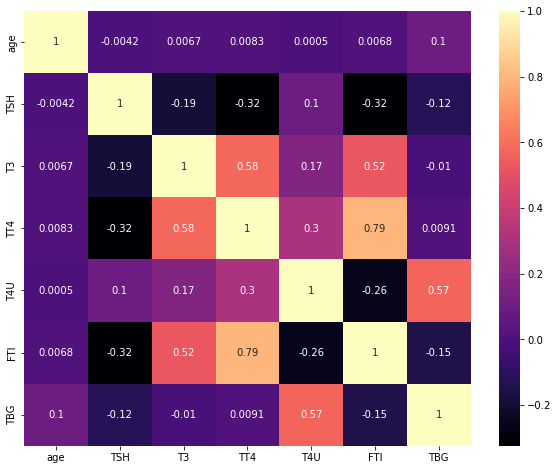

In [15]:
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(dfT.corr(), annot=True, cmap="magma");

In [16]:
dfT.shape, dfT.columns

# indices que são numéricos
# 0 17 19 21 23 25 27

((7546, 23),
 Index(['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
        'on_antithyroid_meds', 'sick', 'pregnant', 'thyroid_surgery',
        'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium',
        'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH', 'T3', 'TT4', 'T4U',
        'FTI', 'TBG', 'target'],
       dtype='object'))

In [17]:
# Esse valor tem os dados desbalanceados devido uma quantidade de NaN presente
# E por termos valores vazios no dataset

dfT.mean()

C:\Users\Matheus\AppData\Local\Temp\ipykernel_13304\2626342529.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dfT.mean()


age     78.013782
TSH      5.421753
T3       2.020935
TT4    105.203373
T4U      0.967322
FTI    110.571745
TBG     22.955019
dtype: float64

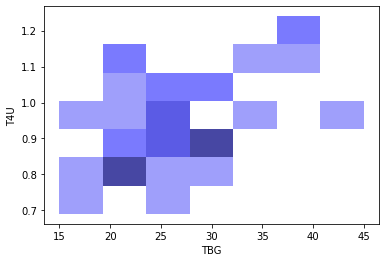

In [18]:
sns.histplot(x=dfT['TBG'], y=dfT['T4U'], kde=True, color='darkblue');

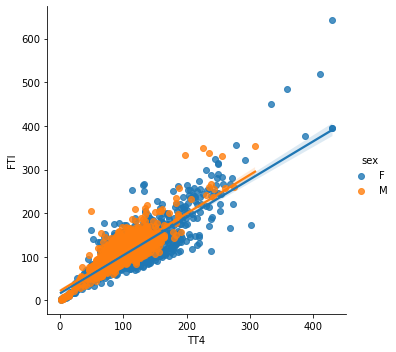

In [23]:
sns.lmplot(data=dfT,
          x='TT4', y='FTI',
           hue='sex');

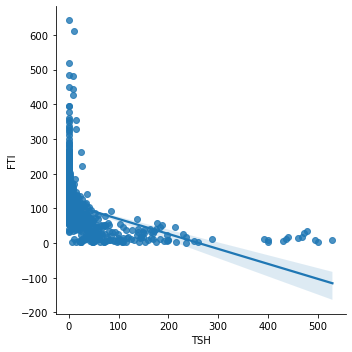

In [24]:
sns.lmplot(data=dfT,
          x='TSH', y='FTI');

<AxesSubplot:xlabel='T4U', ylabel='TT4'>

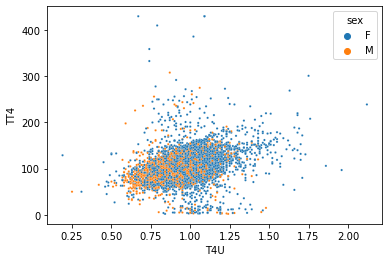

In [27]:
sns.scatterplot(data=dfT, x='T4U', y='TT4', s=5, hue='sex')

<AxesSubplot:xlabel='T4U', ylabel='TSH'>

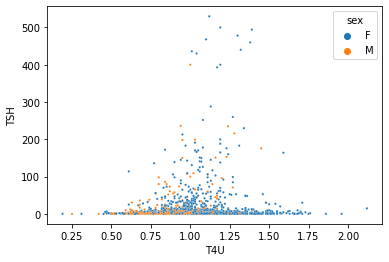

In [29]:
sns.scatterplot(data=dfT, x='T4U', y='TSH', s=5, hue='sex')

C:\Users\Matheus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


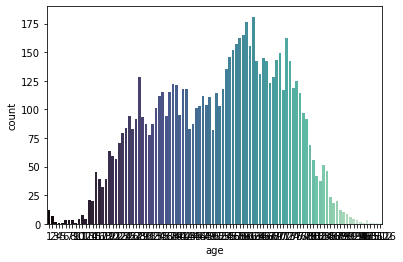

In [30]:
sns.countplot(dfT['age'], palette='mako');
# dfT[dfT['age'] <= 0] >>>> sem idades negativas

In [31]:
# Pessoas com mais de 100 anos de idade apresentam valor de diagnóstico 'negativo'
dfT[dfT['age'] >= 100]

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,TBG,target
2976,455,F,f,f,f,f,f,f,f,f,...,f,f,f,1.10,2.0,118.0,1.13,104.0,NaN,negative
5710,65511,M,f,f,f,f,f,f,f,f,...,f,f,f,0.38,2.0,113.0,1.08,104.0,NaN,negative
6392,65512,M,f,f,f,f,f,f,f,f,...,f,f,f,0.03,2.8,112.0,0.84,133.0,NaN,negative
8105,65526,F,f,f,f,f,f,f,f,f,...,f,f,f,1.50,NaN,132.0,1.02,129.0,NaN,negative


In [32]:
# changing age of observations with ('age' > 100) to null
dfT['age'] = np.where((dfT.age > 100), np.nan, dfT.age)
# dfT[dfT['age'] >= 100]

<AxesSubplot:xlabel='target', ylabel='TBG'>

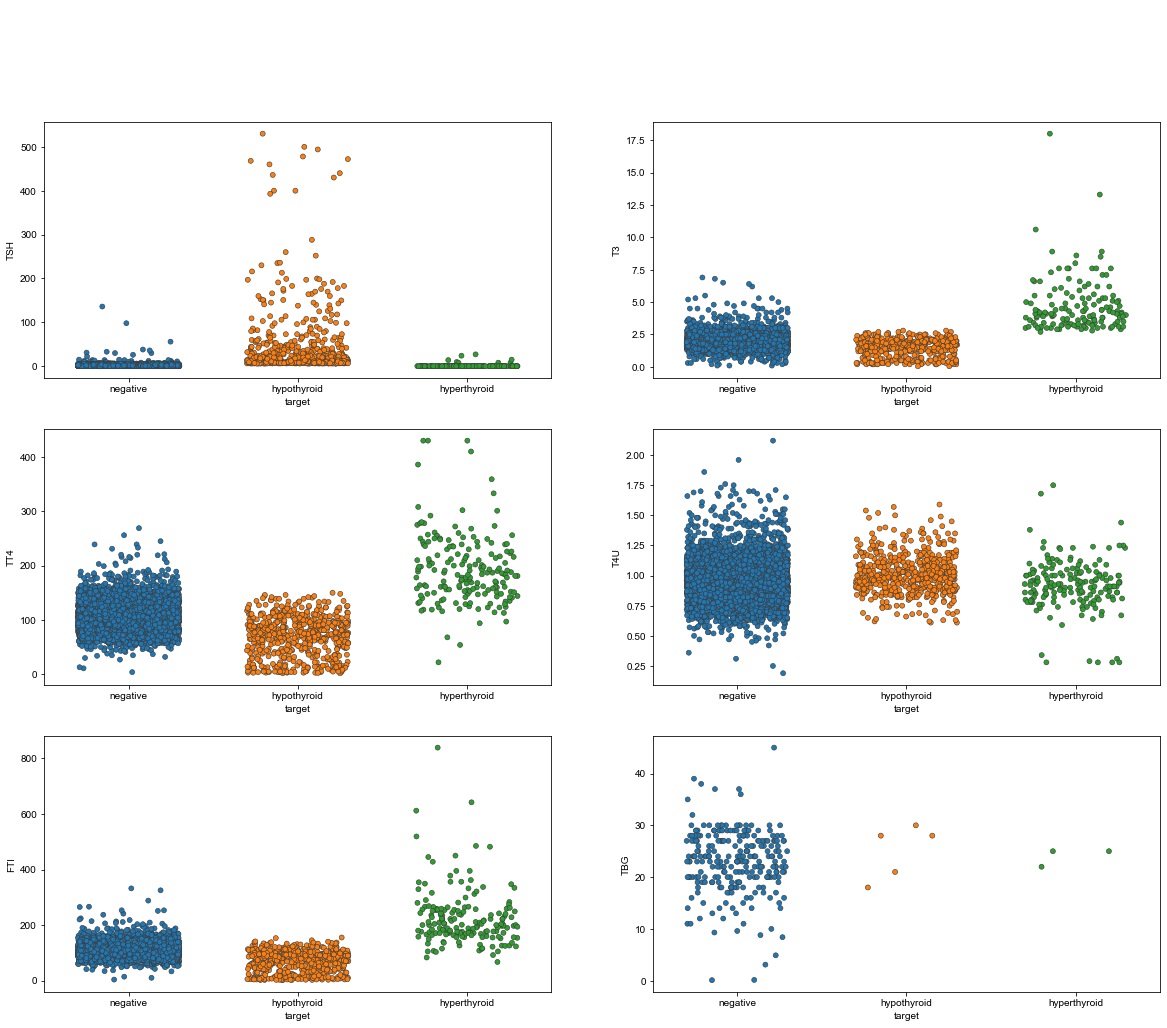

In [33]:
# setting up grid for multiple seaborn plots
fig, axes = plt.subplots(3,2,figsize=(20,16))
fig.suptitle('Numerical Attributes vs. Target', color='white')
sns.set_style('whitegrid');

# TSH vs. 'target'
sns.stripplot(x=dfT.target, y=dfT.TSH, linewidth=0.6, jitter= 0.3, ax=axes[0, 0])

# T3 vs. 'target'
sns.stripplot(x=dfT.target, y=dfT.T3, linewidth=0.6, jitter= 0.3, ax=axes[0, 1])

# TT4 vs. 'target'
sns.stripplot(x=dfT.target, y=dfT.TT4, linewidth=0.6, jitter= 0.3, ax=axes[1, 0])

# T4U vs. 'target'
sns.stripplot(x=dfT.target, y=dfT.T4U, linewidth=0.6, jitter= 0.3, ax=axes[1, 1])

# FTI vs. 'target'
sns.stripplot(x=dfT.target, y=dfT.FTI, linewidth=0.6, jitter= 0.3, ax=axes[2, 0])

# TBG vs. 'target'
sns.stripplot(x=dfT.target, y=dfT.TBG, linewidth=0.6, jitter= 0.3, ax=axes[2, 1])

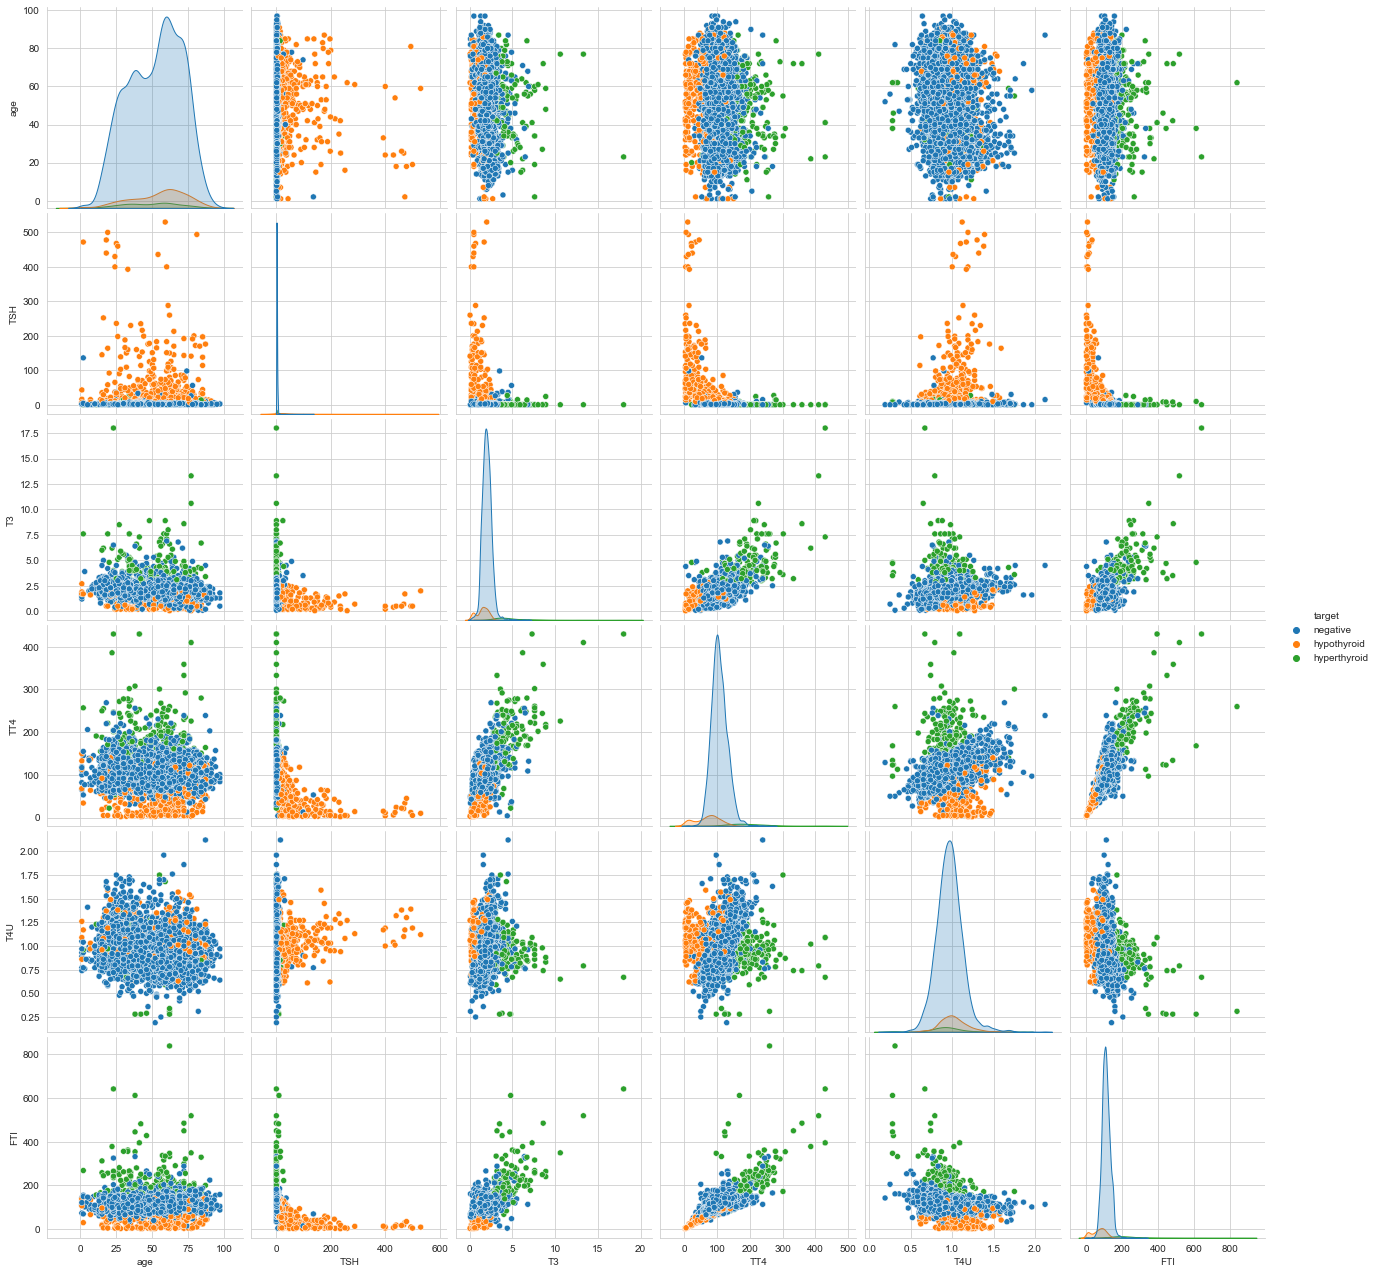

In [34]:
numericalDF = dfT[['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'target']].copy()
sns.set_style('whitegrid');
sns.pairplot(numericalDF, hue='target', height=3);
plt.show()

In [35]:
dfT = dfT.select_dtypes(include='object')
dfT['sex'] = dfT['sex'].map({'F' : 0, 'M' : 1})
# to get all the columns except the sex & target
cols = dfT.loc[:, ~dfT.columns.isin(['sex','target','referral_source'])] 

for c in cols:
    dfT[c] = dfT[c].map({'f' : 0, 't' : 1})

In [37]:
dfT.drop_duplicates()

,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,target
0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,negative
1,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,negative
2,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,negative
12,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,negative
14,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8479,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,negative
8574,1.0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,negative
8626,0.0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,negative
8726,0.0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,negative


In [38]:
X = dfT.iloc[:, 0:15].values
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [39]:
y = dfT.iloc[:, 15].values
y

array(['negative', 'negative', 'negative', ..., 'negative', 'negative',
       'negative'], dtype=object)

In [40]:
# precisamos tratar os valores de X, pois estão muito desbalanceados

X[:,0].min(), X[:,0].max()

(0.0, 1.0)

In [41]:
y

array(['negative', 'negative', 'negative', ..., 'negative', 'negative',
       'negative'], dtype=object)

#### Precisamos fazer grupos que dividam a classe 'target' nos subgrupos de diagnóstico
<br />
1. hyperthyroid conditions:

    A   hyperthyroid
    B   T3 toxic
    C   toxic goitre
    D   secondary toxic
    
<br />
2. hypothyroid conditions:

    E   hypothyroid
    F   primary hypothyroid
    G   compensated hypothyroid
    H   secondary hypothyroid

<br />

##### Nós fizemos isso com esse código no início do entendimento do dataset

<br />

```

diagnoses = {'-': 'negative',
             'A': 'hyperthyroid', 
             'B': 'hyperthyroid', 
             'C': 'hyperthyroid', 
             'D': 'hyperthyroid',
             'E': 'hypothyroid', 
             'F': 'hypothyroid', 
             'G': 'hypothyroid', 
             'H': 'hypothyroid'}

dfT['target'] = dfT['target'].map(diagnoses) # re-mapping
# dropping observations with 'target' null after re-mapping
dfT.dropna(subset=['target'], inplace=True)

```


### Treinando os modelos

In [45]:
## Dividindo a base de dados em treino e teste

from sklearn.model_selection import train_test_split
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=0)

In [46]:
from sklearn.naive_bayes import GaussianNB
naive = GaussianNB()
naive.fit(X_treinamento, y_treinamento)

GaussianNB()

In [47]:
previsoes = naive.predict(X_teste)


In [50]:
accuracy_score(y_teste, previsoes) * 100

10.264900662251655

In [51]:
confusion_matrix(y_teste, previsoes)

array([[  37,    3,    0],
       [ 107,    8,    4],
       [1034,  207,  110]], dtype=int64)

0.10264900662251655

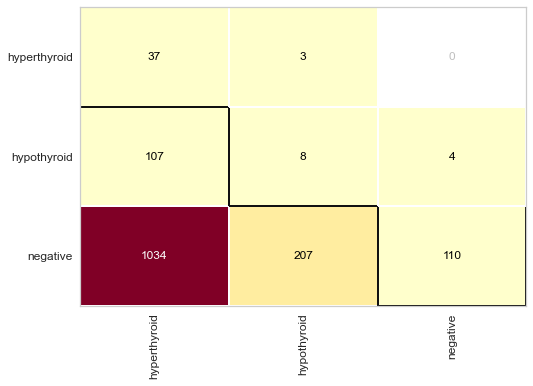

In [52]:
from yellowbrick.classifier import ConfusionMatrix

cm = ConfusionMatrix(naive)
cm.fit(X_treinamento, y_treinamento)
cm.score(X_teste, y_teste)

In [53]:
print(classification_report(y_teste, previsoes))

              precision    recall  f1-score   support

hyperthyroid       0.03      0.93      0.06        40
 hypothyroid       0.04      0.07      0.05       119
    negative       0.96      0.08      0.15      1351

    accuracy                           0.10      1510
   macro avg       0.34      0.36      0.09      1510
weighted avg       0.87      0.10      0.14      1510

